In [35]:
## Imports
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from cycler import cycler
import os
import numpy as np

In [36]:
## Setup headers and fonts

plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})        # use LaTeX

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams.update({'font.size': 12})



Header = ["Sources", "Targets", "DirectSumComparison","NumSources","NumTargets","Theta","Order","TreeType","MaxParNode", "BatchSize", "Kappa",
          "PotentialType","sflag","pflag","p","time_preproc", "TreeBuildTime", "time2", "time3", "time4", "time5",
          "time6", "time7", "time8", "time9", "time10", "time11", "TreecodeTime", "time13",
          "dpengglob", "tpengglob", "abs_pengerr", "RelativeError", "inferr", "relinferr", "2-norm Error", "Rel. 2-Norm Error", "NumDevices"]

In [37]:
## Load Dataframe

resultsFile='TitanV_Coulomb_1000000.csv' 
resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/KITCpaperData/gpu_vs_cpu/'
directSumTime=774.8
directSumTime=11.6
df = pd.read_csv(resultsDir + resultsFile, names=Header)

In [38]:
df;

In [46]:
## Plotting functions

def logAversusLogBcolorbyC(df,A,B,C,hlines={},save=False):
    custom_cycler = (cycler(color=['r', 'g', 'b']) +
                  cycler(linestyle=['--', '--', '--']))

    plt.rc('lines', linewidth=1)
    plt.rc('axes', prop_cycle=custom_cycler)
    
    
    df = df.sort_values(by=B)
    fig, ax = plt.subplots(figsize=(8,6))

#     ax.set_prop_cycle(custom_cycler)
    grouped = df.groupby(C)
    for name,group in grouped:
        if isinstance(name,str):
            group.plot(x=B, y=A, style='o-', ax=ax, loglog=True,label='%s = %s'%(C,name))
        elif isinstance(name,float):
            group.plot(x=B, y=A, style='o-', ax=ax, loglog=True,label='%s = %f'%(C,name))
        elif isinstance(name,int):
            group.plot(x=B, y=A, style='o-', ax=ax, loglog=True,label='%s = %i'%(C,name))
        
    plt.xlabel(B)
    plt.ylabel(A)
    
    for hline in hlines:
#     plt.axhline(y=62.6, color='r', linestyle='-')
        plt.axhline(y=hline, color='r', linestyle='-')


    plt.grid()
#     plt.ylim([20,100])
    
    plt.legend(loc = 'best')

    if save == True:
        saveID = 'log'+A+'VsLog'+B+'ColoredBy'+C
        plt.savefig(plotsDir+saveID+'.pdf', bbox_inches='tight',format='pdf')
    plt.show()

<IPython.core.display.Javascript object>


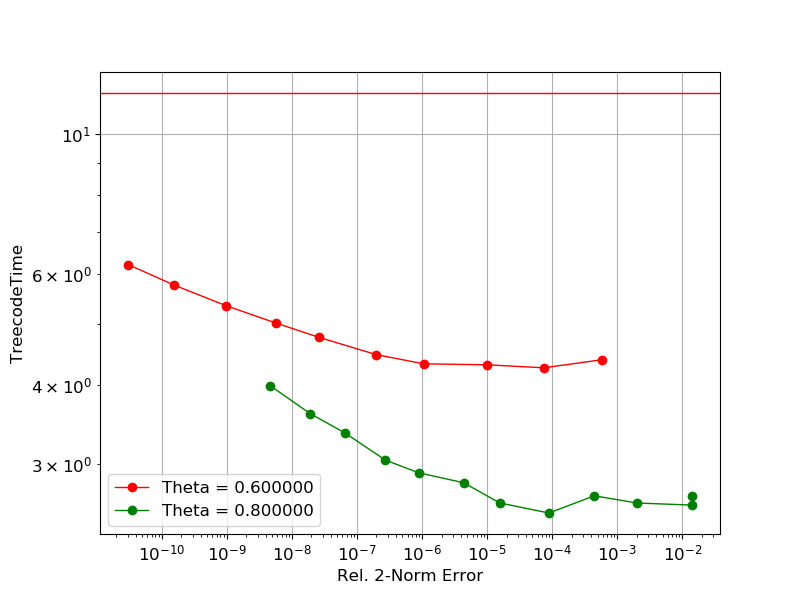

In [47]:
# df2 = df.loc[df['NumTargets']==1328096]
# df2 = df.loc[df['NumTargets']==4727912]

logAversusLogBcolorbyC(df,'TreecodeTime','Rel. 2-Norm Error','Theta',hlines={11.6})
